# 텍스트 전처리

## 전처리의 단계
1. 정제 (clearning) <br>
분석에 불필요한 노이즈 제거. 토근화 이전에 일어지나 토큰화 이후에도 필요하면 지속적으로 이루어진다. (ex. stopwords 제거) <br>
2. 토큰화 (Tokenization) <br>
주어진 텍스트를 원하는 단위(Token)으로 나누는 작업 <br>
3. 정규화 <br>
같은 의미를 가진 동일한 단어임에도 불구하고 다른 형태로 쓰여진 단어들을 통일시켜서 표준 단어로 만드는 작업 <br>
정규화는 방법에 따라 어간 추출과 표제어 추출(lemmatization)로 나뉜다. <br>
4. 품사 태깅 <br>
앞서 토크놔한 단어에 대해 품사를 파악해 부착하는 것을 의미 <br>

In [1]:
import nltk
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shimgahyeon/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package webtext to
[nltk_data]     /Users/shimgahyeon/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shimgahyeon/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shimgahyeon/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shimgahyeon/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### 토큰화

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize, WordPunctTokenizer
para = "Hello everyone. It's good to see you. Let's start our text mining class!"
print(sent_tokenize(para))
print(word_tokenize(para))
print(WordPunctTokenizer().tokenize(para))

['Hello everyone.', "It's good to see you.", "Let's start our text mining class!"]
['Hello', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'our', 'text', 'mining', 'class', '!']
['Hello', 'everyone', '.', 'It', "'", 's', 'good', 'to', 'see', 'you', '.', 'Let', "'", 's', 'start', 'our', 'text', 'mining', 'class', '!']


In [7]:
from nltk.tokenize import RegexpTokenizer
# regular expression을 이용한 tokenizer
# 단어 단위로 tokenize \w: 문자나 숫자를 의미. 즉 문자나 숫자 혹은 '가 반복되는 것을 찾아냄
tokenizer = RegexpTokenizer("[\w']+")

# can't를 하나의 단어로 인식
print(tokenizer.tokenize("Sorry, I can't go there."))

['Sorry', 'I', "can't", 'go', 'there']


In [8]:
text1 = "Sorry, I can't go there."
tokenizer = RegexpTokenizer("['\w']{3,}")
print(tokenizer.tokenize(text1.lower()))

['sorry', "can't", 'there']


### 불용어
불용어: 보통 불용어는 빈도가 너무 적거나 혹은 반대로 빈도가 너무 많아서 별 필요가 없는 단어들. 영어에서는 보통 길이가 3 미만인 단어들은 삭제하는 것이 일반적이다.

In [9]:
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))
english_stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [10]:
text1 = "Sorry, I can't go to movie yesterday."
tokenizer = RegexpTokenizer("[\w']+")
tokens = tokenizer.tokenize(text1.lower())
result = [word for word in tokens if word not in english_stops]
print(result)

['sorry', "can't", 'go', 'movie', 'yesterday']


### 정규화
같은 의미를 가진 동일한 단어이면서 다른 형태로 쓰여진 단어들을 통일해 표준 단어로 만드는 작업

#### 어간(stem) 추출
어형이 변형된 단어로부터 접사 등을 제거하고 그 단어의 어간을 분리해내는 작업  
영어에 대한 어간 추출 알고리즘으로는 포터 스테머(Porter Stemmer), 랭카스터 스테머(Lancaster Stemmer) 등으로 잘 알려져 있다.

In [11]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

cook cookeri cookbook


In [13]:
para = "Hello everyone. It's good to see you. Let's start our text mining class!"
tokens = word_tokenize(para)
print(tokens)

result = [stemmer.stem(token) for token in tokens]
print(result)

['Hello', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'our', 'text', 'mining', 'class', '!']
['hello', 'everyon', '.', 'it', "'s", 'good', 'to', 'see', 'you', '.', 'let', "'s", 'start', 'our', 'text', 'mine', 'class', '!']


In [15]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

cook cookery cookbook


### 표제어 추출 (Lemmatization)
주어진 단어를 기본형으로 변환하는 것  
사전을 이용해 사전에 정의된 기본형으로 변환한다  
영어에 대한 lemmatizer로 유명한 어휘 데이터베이스인 WordNet을 이용한 WordNet lemmatizer가 잘 알려져있다.

In [17]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shimgahyeon/nltk_data...


True

In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('cooking'))
print(lemmatizer.lemmatize('cooking', pos='v')) # 품사 지정
print(lemmatizer.lemmatize('cookery'))
print(lemmatizer.lemmatize('cookbooks'))

cooking
cook
cookery
cookbook


## 품사 태깅 (Part-of-Speech Tagging)
형태소에 대해 품사를 파악해 부착(tagging)하는 작업을 말한다

In [20]:
tokens = word_tokenize("Hello everyone. It's good to see you. Let's start our text mining class!")
print(nltk.pos_tag(tokens))

[('Hello', 'NNP'), ('everyone', 'NN'), ('.', '.'), ('It', 'PRP'), ("'s", 'VBZ'), ('good', 'JJ'), ('to', 'TO'), ('see', 'VB'), ('you', 'PRP'), ('.', '.'), ('Let', 'VB'), ("'s", 'POS'), ('start', 'VB'), ('our', 'PRP$'), ('text', 'NN'), ('mining', 'NN'), ('class', 'NN'), ('!', '.')]


In [22]:
nltk.download('tagsets')
nltk.help.upenn_tagset('CC')

[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/shimgahyeon/nltk_data...


CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet


[nltk_data]   Unzipping help/tagsets.zip.


원하는 품사의 단어들만 추출하기

In [24]:
my_tag_set = ['NN', 'VB', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(tokens) if tag in my_tag_set] 
print(my_words)

['everyone', 'good', 'see', 'Let', 'start', 'text', 'mining', 'class']


# 2. 카운트 기반의 문서 표현

## BOW 기반의 카운트 벡터 생성

In [26]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/shimgahyeon/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [31]:
from nltk.corpus import movie_reviews
print("review count:", len(movie_reviews.fileids()))

review count: 2000


In [36]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer("[\w']{3,}")
english_stops = set(stopwords.words('english'))

# words() 대신 raw()로 원문 가져옴
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# stopwords 적용 및 토큰화
tokens = [[token for token in tokenizer.tokenize(doc) if token not in english_stops] for doc in documents]
word_count = {}

for text in tokens:
    for word in text:
        word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)

print('num of features:', len(sorted_features))
for word in sorted_features[:10]:
    print(f"count of '{word}': {word_count[word]}", end=', ')

num of features: 43030
count of 'film': 8935, count of 'one': 5791, count of 'movie': 5538, count of 'like': 3690, count of 'even': 2564, count of 'time': 2409, count of 'good': 2407, count of 'story': 2136, count of 'would': 2084, count of 'much': 2049, 

In [37]:
# 빈도 높은 상위 1000개의 단어만 추출해 features 구성
word_features = sorted_features[:1000]

주어진 문서를 카운트 벡터로 변환

In [39]:
# 주어진 document를 feature로 변환하는 함수, word_features 사용
def document_features(document, word_features):
    word_count = {}
    for word in document: # document에 있는 단어들에 대해 빈도수 먼저 계산
        word_count[word] = word_count.get(word, 0) + 1
    
    features = []
    # word features의 단어에 대해 계산된 빈도수를 feature에 추가
    for word in word_features:
        features.append(word_count.get(word, 0))
        
    return features

In [40]:
word_features_ex = ['one', 'two', 'teen', 'couples', 'solo']
doc_ex = ['two', 'two', 'couples']
print(document_features(doc_ex, word_features_ex))

[0, 2, 0, 1, 0]


전체 리뷰 집합에 대해 특성 추출

In [43]:
feature_sets = [document_features(d, word_features) for d in tokens]
for i in range(20):
    print(f'({word_features[i]}, {feature_sets[0][i]})', end=', ')

(film, 5), (one, 3), (movie, 6), (like, 3), (even, 3), (time, 0), (good, 2), (story, 0), (would, 1), (much, 0), (also, 1), (get, 3), (character, 1), (two, 2), (well, 1), (first, 0), (characters, 1), (see, 2), (way, 3), (make, 5), 

### 사이킷런으로 카운트 벡터 생성

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer() 모든 매개변수에 기본값을 사용하는 경우

# 앞에서 생성한 word_features로 특성 집합을 지정하는 경우
cv = CountVectorizer(vocabulary=word_features)

# 특성 집합을 지정하지 않고 최대 특성의 수를 지정하는 경우
# cv = CountVectorizer(max_features=1000)

In [49]:
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
# reviews를 이용해 count vector를 학습하고 변환
reviews_cv = cv.fit_transform(reviews)
# counter vector에 사용된 feature의 이름을 반환
print(cv.get_feature_names_out()[:20]) 
# 비교를 위해 출력
print(word_features[:20])

['film' 'one' 'movie' 'like' 'even' 'time' 'good' 'story' 'would' 'much'
 'also' 'get' 'character' 'two' 'well' 'first' 'characters' 'see' 'way'
 'make']
['film', 'one', 'movie', 'like', 'even', 'time', 'good', 'story', 'would', 'much', 'also', 'get', 'character', 'two', 'well', 'first', 'characters', 'see', 'way', 'make']


In [50]:
print("type of count vectors:", type(reviews_cv))
print("shape of count vectors:", reviews_cv.shape)
print("sample of count vector:")
print(reviews_cv[0, :10])

type of count vectors: <class 'scipy.sparse.csr.csr_matrix'>
shape of count vectors: (2000, 1000)
sample of count vector:
  (0, 0)	6
  (0, 1)	3
  (0, 2)	6
  (0, 3)	3
  (0, 4)	3
  (0, 6)	2
  (0, 8)	1


In [51]:
reviews_cv

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 252984 stored elements in Compressed Sparse Row format>

In [52]:
print(feature_sets[0][:20])
print(reviews_cv.toarray()[0, :20])

[5, 3, 6, 3, 3, 0, 2, 0, 1, 0, 1, 3, 1, 2, 1, 0, 1, 2, 3, 5]
[6 3 6 3 3 0 2 0 1 0 1 3 2 2 1 0 1 2 3 5]


In [53]:
for word, count in zip(cv.get_feature_names_out()[:20], reviews_cv[0].toarray()[0, :20]):
    print(f"{word}:{count}", end=', ')

film:6, one:3, movie:6, like:3, even:3, time:0, good:2, story:0, would:1, much:0, also:1, get:3, character:2, two:2, well:1, first:0, characters:1, see:2, way:3, make:5, 

### 카운트 벡터의 활용
카운트 벡터는 문서 간의 유사도를 측정하는 데에 사용될 수 있다.

# 4. Topic Modeling

## LDA

LDA는 내재한 토픽을 유추하고자 하는 통계적 방법론이다. LDA의 기본 가정은 문서들이 쓰여질 떄 그 문서를 구성하는 몇 개의 토픽이 존재하며 각 토픽은 단어의 집합으로 구성되었다는 것이다. 따라서 각 문서에 사용된 단어들의 빈도를 축정하고 이로부터 역으로 모든 문서의 토픽 분포와 각 토픽의 단어분포를 추정하는 것이다. 토픽 개수 K와 å, ß는 하이퍼 파라미터로 사용된다. 따라서 적절한 하이퍼파라미터를 통해서 토픽 모델링의 성능을 높일 수 있다. 이때 무엇이 적절한 값인지 판단하려면 성능에 대한 척도가 필요한데, 주로 사용하는 것으로 혼란도(perplexity)와 토픽 응집도(topic coherence)가 있다.

1. 혼란도 (Perplexity)  
특정한 확률 모형이 실제로 관측되는 값을 얼마나 유사하게 예측해내는지를 평가할 때 사용된다. 토픽 모델링에서는 우리가 추정한 디리클레 모형이 주어진 문서 집합을 얼마나 유사하게 생성할 수 있는지 나타낸다고 해석할 수 있다. **값이 작을 수록** 토픽 모델이 문서집합을 잘 반영한다.

2. 토픽 응집도 (Coherence)  
각 토픽에서 상위 비중을 차지하는 단어들이 의미적으로 유사한지를 나타내는 척도이다. 만일 토픽이 단일 주제를 잘 표현한다면 의미적으로 유사한 단어들의 비중이 높을 것이라는 가정에 따라 성능을 표현한다. 이 값은 혼란도와 달리 **값이 클수록** 좋다.  

토픽 모형의 성능을 평가할 때 무엇보다 중요한 점은 **혼란도나 토픽 응집도와 같은 척도의 수치보다 토픽의 해석이 사람이 보기에 자연스러운 것이 더 중요하다는 것이다.** 따라서 척도에 따라 토픽 모형을 바로 선택하기보다는 최적값 근처에서 몇 개의 값을 선택해 모델링을 수행하고 그 결과를 사람이 직접 비교해보는 것이 좋다. 

In [55]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 'comp.sys.ibm.pc.hardware', 'sci.crypt']

# 학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
print("Train set size:", len(newsgroups_train.data))
print("Selected categories:", newsgroups_train.target_names)

Train set size: 3219
Selected categories: ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'sci.space', 'talk.religion.misc']


Count Vector 생성 

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="['\w']{3,}", stop_words='english', max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(newsgroups_train.data)

### LDA of sklearn
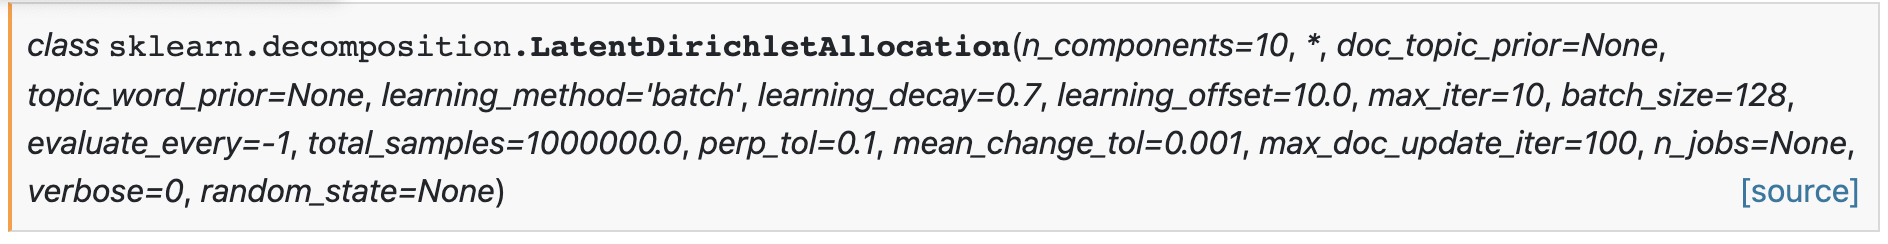
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html


* doc_topic_prior(a)  
  문서의 사전 **토픽분포** 결정
  default: 1/n_components
* topic_word_prior(ß)  
  문서의 사전 **단어분포**를 결정하는 매개변수
  default: 1/n_components   
  a를 50/n_components, ß를 0.1로 사용해보길 권함 (논문)
* n_components  
  토픽의 수
* max_iter   
  알고리즘의 최대 반복 횟수
  default는 10, 5이하로 주면 제대로 결과가 안나올 수 있다.
* learning_method   
  'batch'와 'online' 두 가지가 있다.
  'batch'가 'online'보다 성능이 더 좋은 대신 느리다
* n_jobs  
  사용하는 프로세서 수
  -1을 주면 가능한 모든 프로세서 사용
* random_state  
  random seed

In [63]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components=10, # 추출할 Topic 수
                                max_iter=5,
                                topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs=-1,
                                random_state=0)

review_topics = lda.fit_transform(review_cv)
print("shape of review_topics:", review_topics.shape)
print("sample of review_topics:", review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0) # 각 열에 대한 총 합을 구함
print('Sum of topic weights of documents:', gross_topic_weights) # 전체 말뭉치에서 각 토픽의 평균 분포
print('shape of topic word distribution:', lda.components_.shape) # 각 토픽에 대해 카운트 벡터에서 사용한 단어 2000개의 비중 표현

shape of review_topics: (3219, 10)
sample of review_topics: [0.007 0.007 0.918 0.015 0.01  0.007 0.008 0.007 0.007 0.014]
Sum of topic weights of documents: [0.063 0.073 0.105 0.101 0.068 0.11  0.095 0.099 0.131 0.155]
shape of topic word distribution: (10, 2000)


토픽의 내용을 파악하기 위해서 모든 단어의 비중을 전부 확인하는 것을 불가능하므로 보통은 가장 비중이 높은 단어 10-20개 정도를 본다. 

In [73]:
def print_top_words(model, feature_names, n_top_words):
    '''
    각 토픽별로 비중이 높은 상위 단어들을 찾아 순서대로 출력
    '''
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}: ", end='')
        print( # 역순으로 정렬했을 때 처음부터 n_top_words까지
            ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]) 
        )

In [74]:
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: internet, information, com, anonymous, email, mail, org, computer, privacy, posting
Topic #1: image, graphics, data, available, ftp, file, images, software, version, files
Topic #2: com, article, keith, don't, caltech, think, sandvik, posting, people, sgi
Topic #3: space, nasa, moon, earth, orbit, ___, launch, jpeg, henry, lunar
Topic #4: encryption, government, technology, law, clipper, new, chip, use, islam, access
Topic #5: scsi, com, ide, card, bus, article, ibm, drive, controller, just
Topic #6: com, host, posting, nntp, university, article, just, i'm, know, don't
Topic #7: key, com, chip, clipper, keys, encryption, des, use, bit, disk
Topic #8: university, posting, thanks, host, nntp, help, know, com, i'm, graphics
Topic #9: people, god, don't, say, just, think, believe, does, like, jesus


### 최적의 토픽 수 선택하기
sklearn은 perplexity만 제공

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior=0.1, doc_topic_prior=1.0):
    iter_num = []
    per_value = []
    
    for i in range(start, end+1):
        lda = LatentDirichletAllocation(n_components=i, max_iter=max_iter,
                                        topic_word_prior=topic_word_prior,
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs=-1,
                                        random_state=7)
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')
        
    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    
    return start + per_value.index(min(per_value))

n_components: 6, perplexity: 1057.954
n_components: 7, perplexity: 1062.275
n_components: 8, perplexity: 1013.987
n_components: 9, perplexity: 1019.736
n_components: 10, perplexity: 1028.913
n_components: 11, perplexity: 1037.687
n_components: 12, perplexity: 1032.365
n_components: 13, perplexity: 1034.407
n_components: 14, perplexity: 1037.264
n_components: 15, perplexity: 1047.303


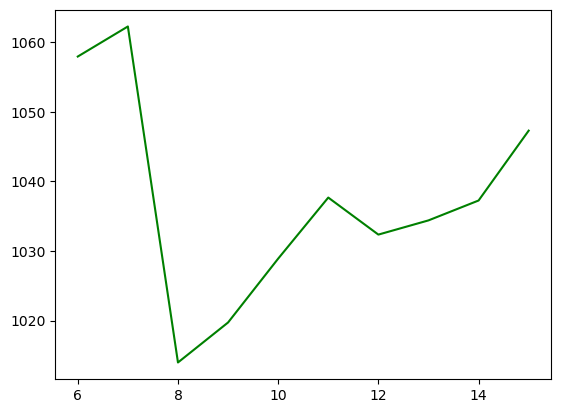

n_components with minimum perplexity: 8


In [79]:
print("n_components with minimum perplexity:", show_perplexity(review_cv, start=6, end=15))

In [81]:
# 최적의 n_components를 대입해서 다시 LDA
lda = LatentDirichletAllocation(n_components=8,
                                max_iter=20,
                                topic_word_prior=0.1,
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs=-1,
                                random_state=7)

review_topics = lda.fit_transform(review_cv)
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: image, graphics, available, mail, file, ftp, data, files, information, software
Topic #1: posting, host, nntp, gov, university, nasa, com, distribution, ___, article
Topic #2: com, keith, article, morality, think, caltech, don't, sgi, objective, posting
Topic #3: com, article, know, jesus, just, don't, i'm, john, good, posting
Topic #4: people, god, does, don't, think, say, believe, just, way, like
Topic #5: drive, scsi, card, com, disk, ide, controller, bus, hard, use
Topic #6: space, nasa, access, launch, year, moon, article, just, digex, shuttle
Topic #7: key, encryption, clipper, chip, com, government, keys, use, security, public


/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: U

## LDA of Gensim

In [94]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

cachedStopWords = stopwords.words("english")

RegTok = RegexpTokenizer("[\w']{3,}")
english_stops = set(stopwords.words('english'))

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    return words

In [98]:
texts = [tokenizer(news) for news in newsgroups_train.data]

### Gensim
Gensim은 먼저 토큰화 결과로부터 토큰과 gensim 모듈이 내부적으로 사용하는 id를 매칭하는 사전을 생성한다. 이를 위한 클래스는 Dictionary이다. 사전을 생성하면 filter_extremes()에서 sklearn의 max_features에 해당하는 keep_n 인수, min_df에 해당하는 no_below, max_df에 해당하는 no_above를 선택할 수 있다. no_below와 no_above로 출현한 문서 빈도수가 너무 낮거나 높은 단어를 제외하고 빈도수가 높은 순으로 keep_n에서 지정된 수의 단어를 특성으로 선택한다.

In [99]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionary 생성
dictionary = Dictionary(texts)
print('Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print("Number of unique words after removing rare and common words:", len(dictionary))

Number of initial unique words in documents: 46466
Number of unique words after removing rare and common words: 2000


In [100]:
dictionary

doc2bow()로 토큰화된 결과를 카운트 벡터, 즉 BOW 형태로 변환한다. 이때 gensim 용어에 매우 주의해야 하는데, gensim은 내부 모듈에서 매개변수를 사용할 때 텍스트의 토큰화 결과를 공통적으로 texts로 지칭한다. 그리고 이 토큰화 결과를 doc2bow()로 변환한 결과를 지칭하는 매개변수로 corpus를 사용한다. 일반적으로 texts 혹은 corpurs라고 쓰면 토큰화 이전의 Raw text를 생각하기 쉽지만 gensim에서는 이와 같이 내부적으로 표현한다는 것을 잘 기억해야 한다.

In [101]:
# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 2000
Number of documents: 3219


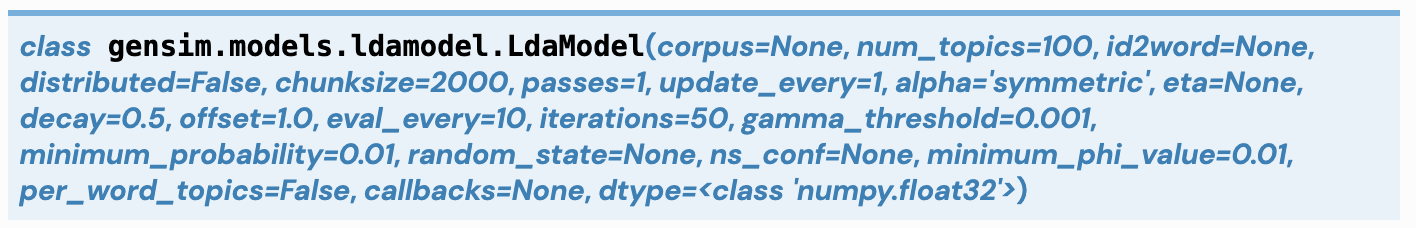
https://radimrehurek.com/gensim/models/ldamodel.html

* corpus  
  doc2bow()를 이용해 변환된 카운트 벡터 리스트
* num_topics  
  토픽의 수 (먼저 10으로 지정)
* id2word  
  dictionary (앞서 생성한 dictionary 그대로 사용)
* passes  
  말 뭉치 전체에 대해 학습하는 횟수 지정 (보통 5정도 준다)
* alpha  
  사전 토픽에 대한 매개변수  
  사전 토픽 분포를 직접 주거나 토픽 분포를 결정하는 전략을 지정할 수 있다.  
  전략은 symmetric, asymmetric, auto 중에서 선택
  * symmetric: 모든 토픽에 대해 고정된 대칭 값 사용
  * asymmetric: 토픽들에 대해 비대칭 값 사용
  * auto: 비대칭 값을 corpus로부터 학습
* eta  
  토픽의 사전 단어분포  
  직접 다양한 방식으로 분포를 주거나 auto로 전략을 지정할 수 있다.

In [102]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary, \
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

CPU times: user 23.7 s, sys: 250 ms, total: 23.9 s
Wall time: 13.7 s


#### print_topics()
각 토픽의 상위 비중 단어 확인  
* num_topics: 매개변수로 보고 싶은 토픽의 수
* num_words: 각 토픽의 상위 단어 수 지정  

보통 num_words만 지정한다

In [103]:
model.print_topics(num_words=10)

[(0,
  '0.023*"com" + 0.018*"keith" + 0.016*"caltech" + 0.013*"sgi" + 0.013*"nntp" + 0.013*"posting" + 0.013*"host" + 0.012*"would" + 0.012*"system" + 0.011*"livesey"'),
 (1,
  '0.020*"morality" + 0.018*"objective" + 0.015*"one" + 0.015*"say" + 0.014*"uiuc" + 0.012*"frank" + 0.012*"values" + 0.010*"faq" + 0.010*"article" + 0.008*"cso"'),
 (2,
  '0.026*"com" + 0.025*"access" + 0.025*"posting" + 0.023*"host" + 0.023*"nntp" + 0.017*"digex" + 0.015*"article" + 0.013*"cwru" + 0.013*"___" + 0.013*"net"'),
 (3,
  '0.021*"university" + 0.017*"posting" + 0.015*"host" + 0.015*"nntp" + 0.013*"article" + 0.010*"com" + 0.009*"know" + 0.009*"i\'m" + 0.009*"would" + 0.009*"thanks"'),
 (4,
  '0.032*"com" + 0.015*"would" + 0.011*"article" + 0.010*"one" + 0.010*"get" + 0.009*"people" + 0.009*"ibm" + 0.008*"government" + 0.007*"good" + 0.007*"i\'m"'),
 (5,
  '0.025*"key" + 0.017*"encryption" + 0.014*"clipper" + 0.014*"chip" + 0.009*"keys" + 0.009*"use" + 0.008*"security" + 0.008*"government" + 0.008*"pub

### get_document_topics()  
인수로 넘긴 문서들에 대해 토픽 분포 반환
* corpus: BOW로 변환된 카운트 벡터
* minimum_probability: 보여질 토픽의 비중에 대한 임계값. 즉, minimum_probability 이상의 토픽만 출력

In [105]:
print("topic distribution of the first document:", model.get_document_topics(corpus)[0])

topic distribution of the first document: [(0, 0.72577506), (8, 0.26994488)]


#### pyLDAvis
gensim의 토픽 모델링 결과를 시각화하는 패키지

In [106]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# LDA 모형을 pyLDAvis 객체에 전달
lda_vis = gensimvis.prepare(model, corpus, dictionary)
lda_vis

/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.137199  0.040249       1        1  22.655431
5      0.065990  0.123618       2        1  14.522843
9      0.072133  0.092872       3        1  12.987427
7      0.138320  0.043609       4        1  11.020429
4     -0.021828  0.007493       5        1   9.298333
6      0.072783 -0.094709       6        1   9.118902
3      0.027375 -0.054949       7        1   8.494209
0     -0.040789 -0.129974       8        1   4.524029
2      0.005360 -0.091972       9        1   4.051827
1     -0.182145  0.063763      10        1   3.326571, topic_info=            Term         Freq        Total Category  logprob  loglift
538        space  1487.000000  1487.000000  Default  30.0000  30.0000
20           com  3752.000000  3752.000000  Default  29.0000  29.0000
834          key  1316.000000  1316.000000  Default  28.0000  28.0000
1551        scsi   741.000000   741.000000  Default  27.0000  27.0000
70       posting  1723.000000  1723.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
65        people    64.443616  1672.570483  Topic10  -5.1558   0.1469
789          sci    53.262242   309.474017  Topic10  -5.3464   1.6436
602   university    56.862372  1487.219417  Topic10  -5.2809   0.1392
294         time    55.766693  1187.715269  Topic10  -5.3004   0.3446
315       better    54.191745   564.543534  Topic10  -5.3291   1.0597

[592 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1359      1  0.006274      128
1359      2  0.069013      128
1359      3  0.037643      128
1359      4  0.878342      128
153       1  0.057463     1993
...     ...       ...      ...
343       8  0.022394    years
343       9  0.005599    years
343      10  0.121303    years
704       3  0.991487      zoo
705       3  0.984035  zoology

[2804 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 10, 8, 5, 7, 4, 1, 3, 2])

### 혼란도와 토픽 응집도를 이용한 최적값 선택
#### CoherenceModel 클래스
* model: 사전에 학습된 토픽 모형
* texts: 텍스트에 대해 토큰화가 된 결과
* corpus: 현재 카운트 벡터
* coherence: 응집도를 계산하는 척도 지정
  default는 c_v
  * u_mass: 가장 속도가 빠른 척도. 반드시 corpus를 함께 줘야 한다
  * c_v, c_uci, cnpmi: 반드시 texts를 넘겨줘야 한다.
* topn: 각 토픽에서 사용할 상위 단어들의 수 지정
* dictionary: model이 있으면 굳이 지정하지 않아도 된다.

In [110]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-1.7493528544065975


In [111]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []
    
    for i in range(start, end+1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                         chunksize=1000, num_topics=i,
                         random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')
        
    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel('num_topics')
    plt.ylabel('perplexity')
    plt.show()
    
    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel('num_topics')
    plt.ylabel('coherence')
    plt.show()

혼란도는 낮을 수록 좋고, 응집도는 높을 수록 좋지만, 두 척도가 모두 최상인 토픽의 수는 없다. 분석해보고 좋은 결과를 써야 한다.

num_topics: 6, perplexity: -7.035, coherence: -1.701
num_topics: 7, perplexity: -7.023, coherence: -1.735
num_topics: 8, perplexity: -7.023, coherence: -1.547
num_topics: 9, perplexity: -7.007, coherence: -1.891
num_topics: 10, perplexity: -6.996, coherence: -1.888
num_topics: 11, perplexity: -7.027, coherence: -2.164
num_topics: 12, perplexity: -7.019, coherence: -2.018
num_topics: 13, perplexity: -7.025, coherence: -2.255
num_topics: 14, perplexity: -7.020, coherence: -2.082
num_topics: 15, perplexity: -7.019, coherence: -2.521


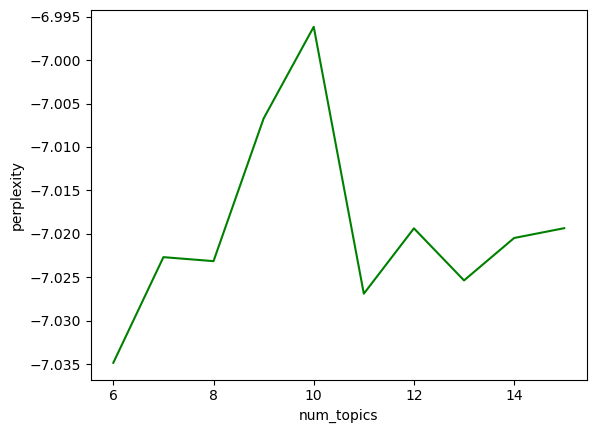

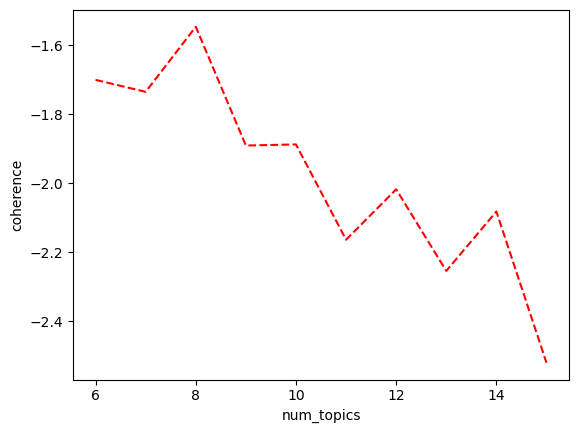

In [112]:
show_coherence(corpus, dictionary, start=6, end=15)